In [51]:
from matplotlib import style
style.use('fivethirtyeight')

In [52]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy
import pandas as pd

# Reflecting into SQLAlchemy ORM

In [53]:
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [54]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [55]:
session = Session(engine)

In [56]:
# reflect the database
Base = automap_base()
Base.prepare(autoload_with=engine)

In [57]:
Base.classes.keys()

['station', 'measurement']

In [58]:
# tables
Station = Base.classes.station
Measurement = Base.classes.measurement

# Precipitation Analysis

In [59]:
most_recent_date = session.query(func.MAX(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [60]:
most_recent_datetime = datetime.strptime(most_recent_date, "%Y-%m-%d")
one_year_ago = (most_recent_datetime - timedelta(days=365)).date()
one_year_ago

datetime.date(2016, 8, 23)

In [61]:
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
precipitation_data[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [62]:
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "precipitation"])
precipitation_df = precipitation_df.sort_values("date")
precipitation_df.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


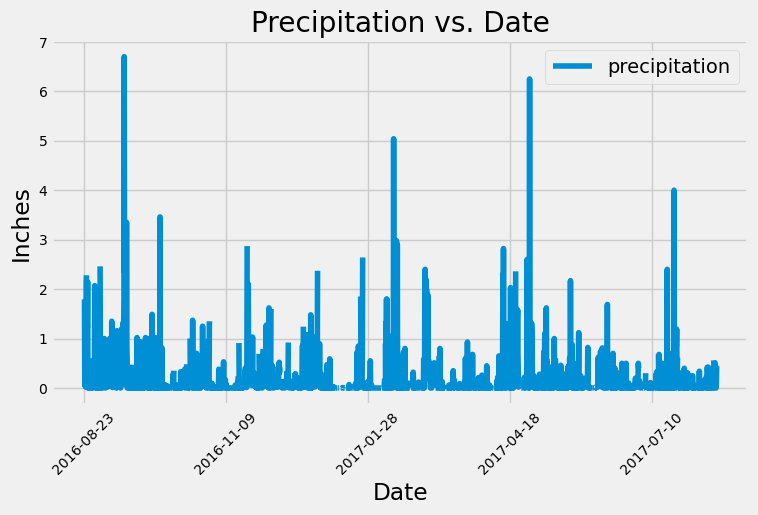

In [63]:
# figure
figure = precipitation_df.plot(x="date", y="precipitation", figsize=(8, 4.5))

# formatting
figure.set_title("Precipitation vs. Date")
figure.set_xlabel("Date")
figure.set_ylabel("Inches")

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# show
plt.show()